# Diabetes Prediction: Logistic Regression vs K-NN Analysis

### 1. Import Required Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score, roc_curve
)

### 2. Load and Explore the Dataset

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# Check for missing values and data types
print("Dataset Info:")
print(df.info())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None

Missing Values:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction

In [5]:
# Statistical summary
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# Check target variable distribution
print("Target Variable Distribution:")
print(df['Outcome'].value_counts())
print(f"\nDiabetes prevalence: {df['Outcome'].mean():.2%}")

Target Variable Distribution:
Outcome
0    500
1    268
Name: count, dtype: int64

Diabetes prevalence: 34.90%


### 3. Exploratory Data Analysis

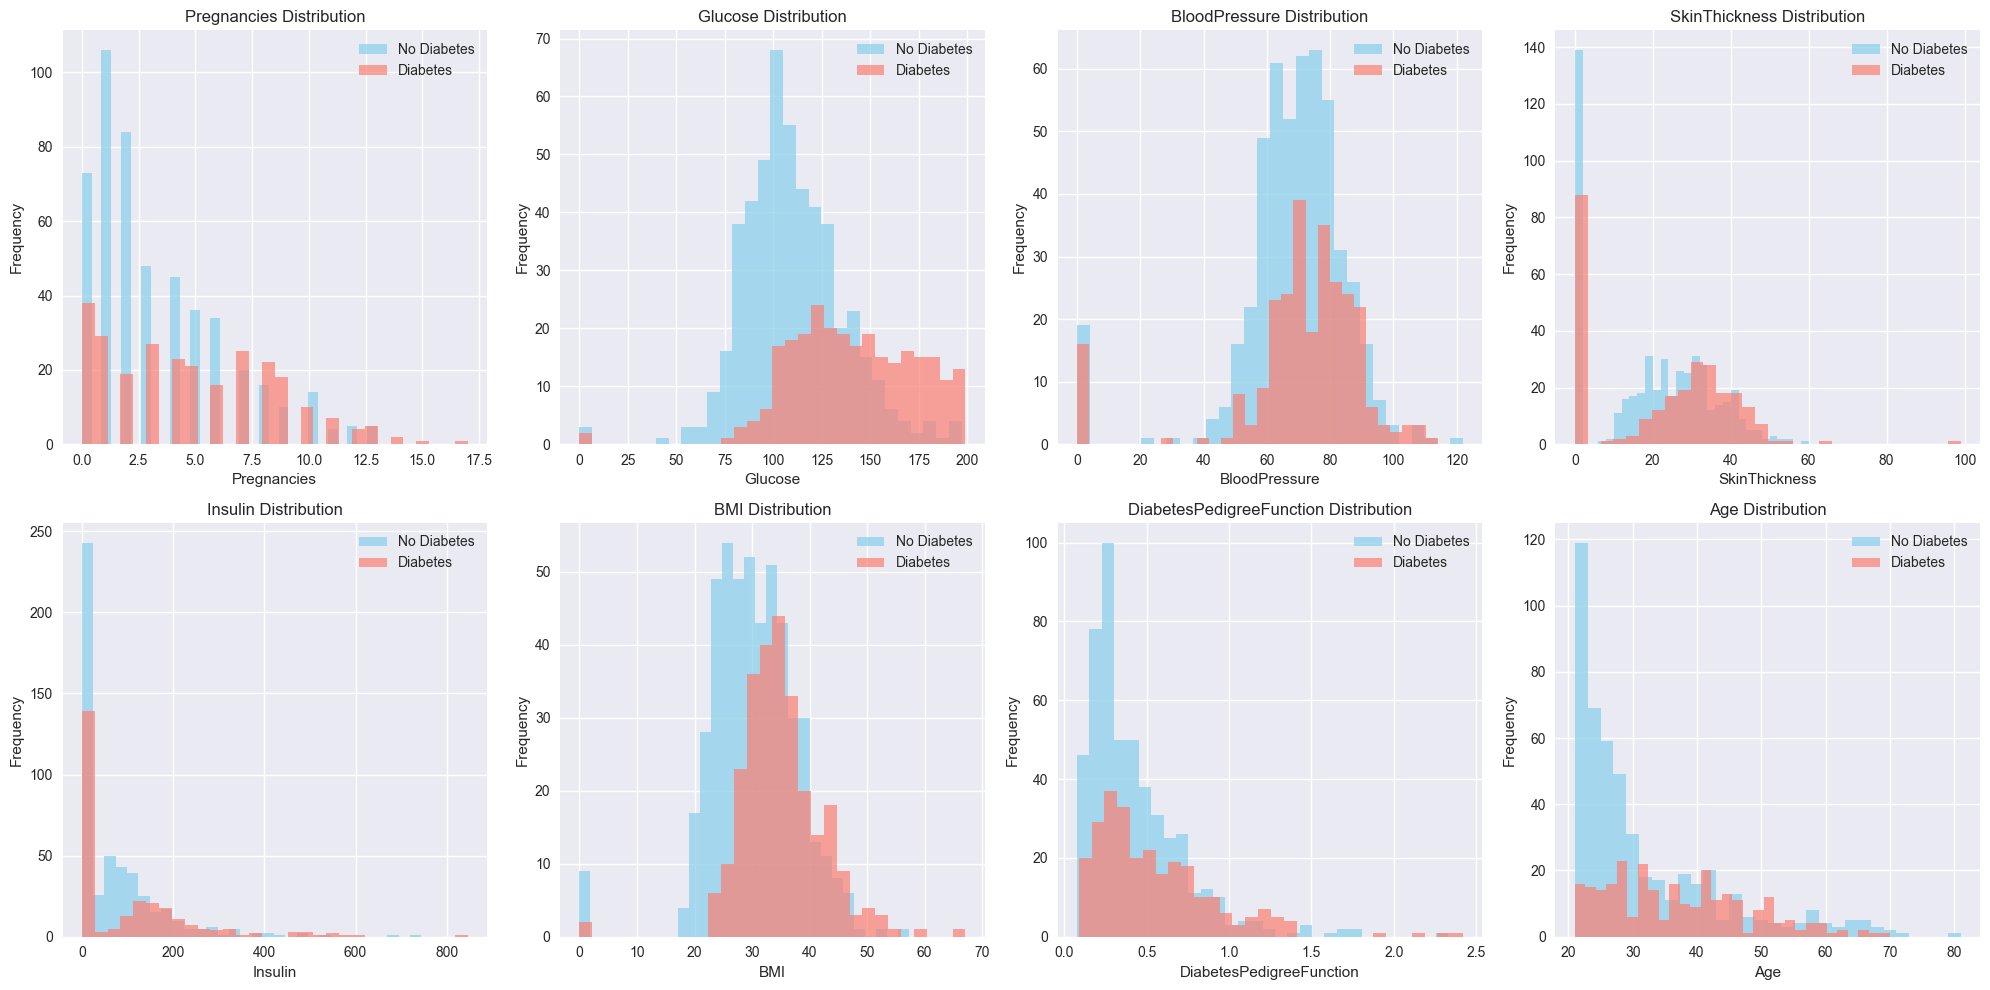

In [7]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

# Plot histograms for each feature
features = df.columns[:-1]  # All columns except 'Outcome'
for i, feature in enumerate(features):
    axes[i].hist(df[df['Outcome']==0][feature], alpha=0.7, label='No Diabetes', bins=30, color='skyblue')
    axes[i].hist(df[df['Outcome']==1][feature], alpha=0.7, label='Diabetes', bins=30, color='salmon')
    axes[i].set_title(f'{feature} Distribution')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].legend()

plt.tight_layout()
plt.show()

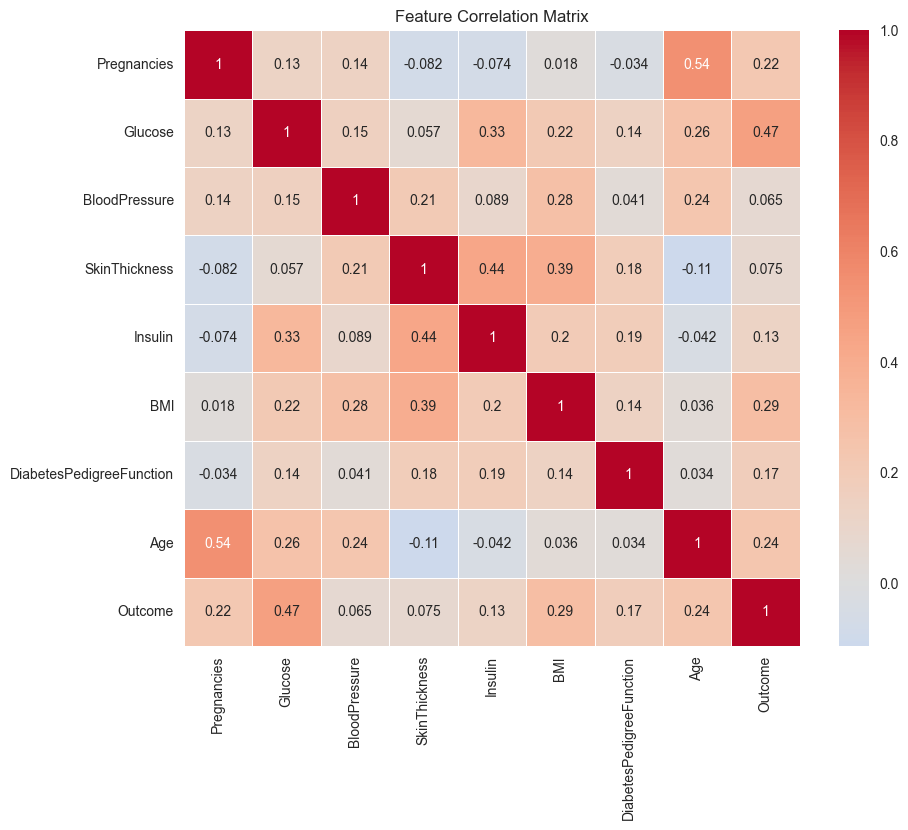

In [9]:
import seaborn as sns
# Correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()

### 4. Data Preprocessing

In [10]:
# Separate features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training set class distribution:")
print(pd.Series(y_train).value_counts(normalize=True))

Training set shape: (614, 8)
Testing set shape: (154, 8)
Training set class distribution:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64


In [11]:
# Feature scaling (important for K-NN and Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed")
print("Original feature ranges (training set):")
print(f"Min: {X_train.min().min():.2f}, Max: {X_train.max().max():.2f}")
print("Scaled feature ranges (training set):")
print(f"Min: {X_train_scaled.min():.2f}, Max: {X_train_scaled.max():.2f}")

Feature scaling completed
Original feature ranges (training set):
Min: 0.00, Max: 744.00
Scaled feature ranges (training set):
Min: -4.07, Max: 6.18


### 5. Model Training and Evaluation
#### 5.1 Logistic Regression

In [12]:
# Train Logistic Regression model
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_scaled, y_train)

# Make predictions
lr_train_pred = lr_model.predict(X_train_scaled)
lr_test_pred = lr_model.predict(X_test_scaled)
lr_test_proba = lr_model.predict_proba(X_test_scaled)[:, 1]

print("Logistic Regression Model Trained")
print("Feature Coefficients:")
feature_importance_lr = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_model.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)
print(feature_importance_lr)

Logistic Regression Model Trained
Feature Coefficients:
                    Feature  Coefficient
1                   Glucose     1.144151
5                       BMI     0.713893
0               Pregnancies     0.373178
6  DiabetesPedigreeFunction     0.255527
2             BloodPressure    -0.197637
7                       Age     0.184179
4                   Insulin    -0.127308
3             SkinThickness     0.066535


#### 5.2 K-Nearest Neighbors

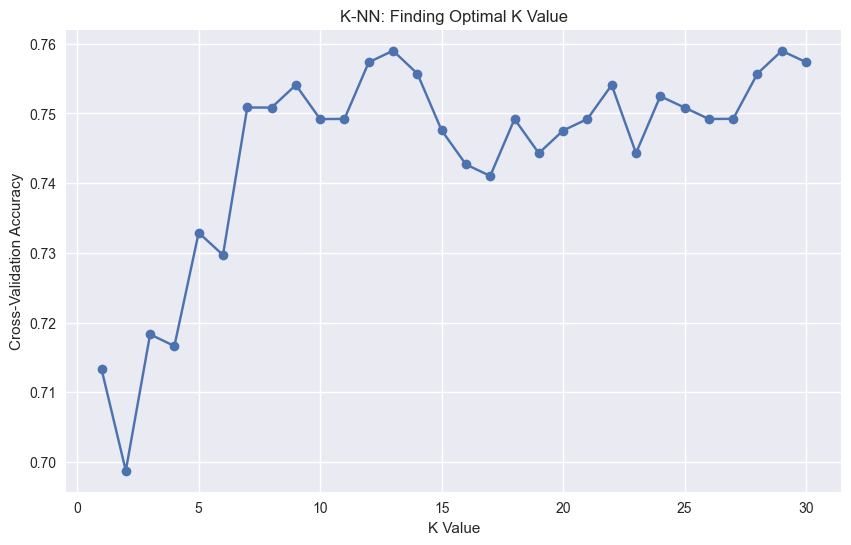

Best K value: 13
Best CV accuracy: 0.7590


In [15]:
# Find optimal K value using cross-validation
k_values = range(1, 31)
cv_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot CV scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, cv_scores, marker='o')
plt.xlabel('K Value')
plt.ylabel('Cross-Validation Accuracy')
plt.title('K-NN: Finding Optimal K Value')
plt.grid(True)
plt.show()

# Find best K
best_k = k_values[np.argmax(cv_scores)]
print(f"Best K value: {best_k}")
print(f"Best CV accuracy: {max(cv_scores):.4f}")

In [16]:
# Train K-NN model with optimal K
knn_model = KNeighborsClassifier(n_neighbors=best_k)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
knn_train_pred = knn_model.predict(X_train_scaled)
knn_test_pred = knn_model.predict(X_test_scaled)
knn_test_proba = knn_model.predict_proba(X_test_scaled)[:, 1]

print(f"K-NN Model Trained with K={best_k}")

K-NN Model Trained with K=13


### 6. Model Performance Comparison

In [17]:
def evaluate_model(y_true, y_pred, y_proba, model_name):
    """Calculate and return model performance metrics"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_proba)
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'AUC': auc
    }

# Evaluate both models
lr_metrics = evaluate_model(y_test, lr_test_pred, lr_test_proba, 'Logistic Regression')
knn_metrics = evaluate_model(y_test, knn_test_pred, knn_test_proba, 'K-NN')

# Create comparison dataframe
comparison_df = pd.DataFrame([lr_metrics, knn_metrics])
comparison_df = comparison_df.set_index('Model')

print("Model Performance Comparison:")
print(comparison_df.round(4))

Model Performance Comparison:
                     Accuracy  Precision  Recall  F1-Score     AUC
Model                                                             
Logistic Regression    0.7143     0.6087  0.5185    0.5600  0.8230
K-NN                   0.7597     0.6809  0.5926    0.6337  0.7798


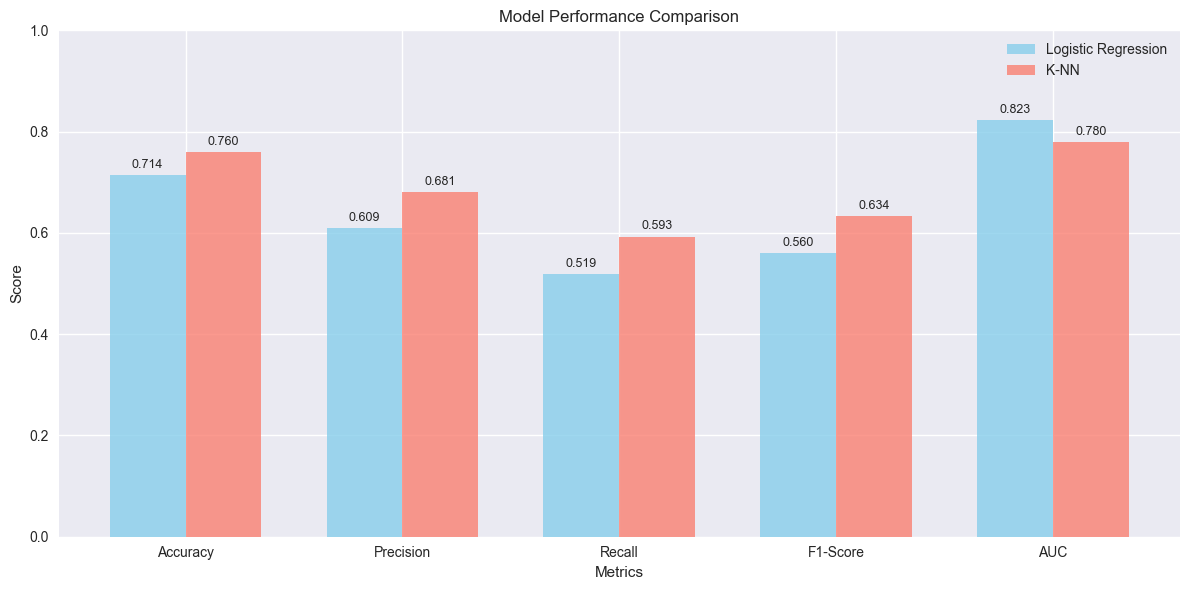

In [18]:
# Visualize performance metrics
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC']
x = np.arange(len(metrics_to_plot))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars1 = ax.bar(x - width/2, comparison_df.loc['Logistic Regression', metrics_to_plot], 
               width, label='Logistic Regression', color='skyblue', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_df.loc['K-NN', metrics_to_plot], 
               width, label='K-NN', color='salmon', alpha=0.8)

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics_to_plot)
ax.legend()
ax.set_ylim(0, 1)

# Add value labels on bars
def add_value_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.3f}',
                   xy=(bar.get_x() + bar.get_width() / 2, height),
                   xytext=(0, 3),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom', fontsize=9)

add_value_labels(bars1)
add_value_labels(bars2)

plt.tight_layout()
plt.show()

### 7. Detailed Analysis
#### 7.1 Confusion Matrices

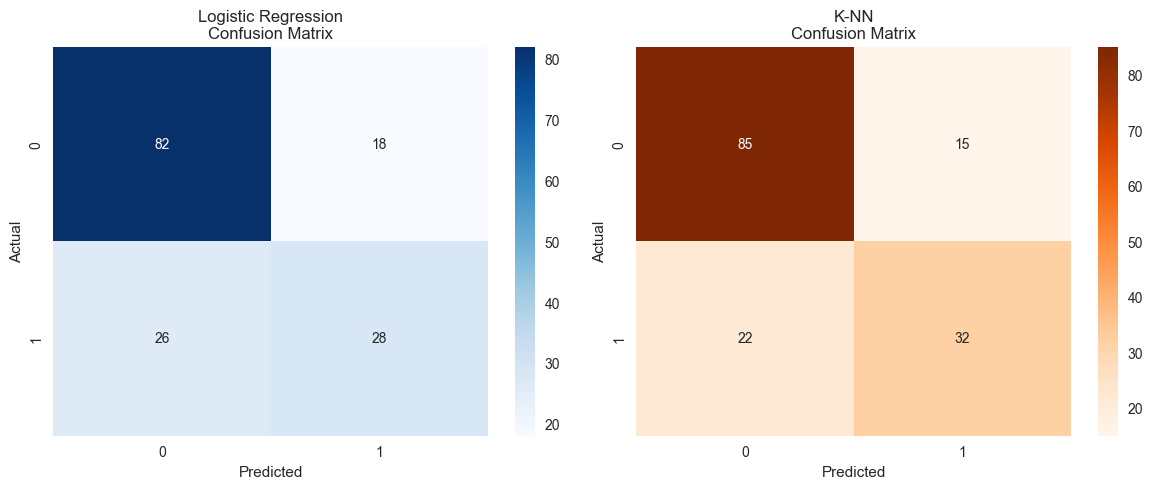

In [19]:
# Plot confusion matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression confusion matrix
cm_lr = confusion_matrix(y_test, lr_test_pred)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression\nConfusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# K-NN confusion matrix
cm_knn = confusion_matrix(y_test, knn_test_pred)
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Oranges', ax=axes[1])
axes[1].set_title('K-NN\nConfusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.show()